In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import VFDstuff as VFD
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
from copy import copy as cp
import matplotlib.path as mpltPath

In [24]:
%matplotlib notebook
fontsize = 14
color = 'k'
linewidth = 4
markersize = 10
margin = 0.2

# Units
distance_unit = 'micrometer'
pressure_unit = 'pascal'
time_unit = 'microsecond'
angle_unit = 'radian'

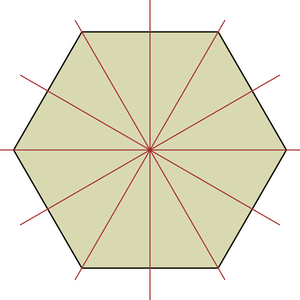

In [25]:
# Defining properties of the crystal and the box it's in

# Some key parameters
L = AssignQuantity(30,distance_unit)
npts_theta = 10
npts_r = 25
r_far_field = L*1.2

In [26]:
if np.mod(npts_theta,2) != 0:
    npts_theta += 1
itheta_middle = np.rint(npts_theta/2).astype('int'); #print(itheta_middle)
left_partner = [True]
for itheta in range(1,itheta_middle+1):
    left_partner.append(False)
for itheta in range(itheta_middle+2,npts_theta+1):
    left_partner.append(True)
left_partner = left_partner * 6; 

right_partner = []
for itheta in range(itheta_middle):
    right_partner.append(True)
for itheta in range(itheta_middle+1,npts_theta+1):
    right_partner.append(False)
right_partner = right_partner * 6

print('\n left partners:')
for i in range(len(left_partner)):
    if np.mod(i,npts_theta) == 0:
        print('')
    print(i,left_partner[i])

print('\n right partners:')
for i in range(len(right_partner)):
    if np.mod(i,npts_theta) == 0:
        print('')
    print(i,right_partner[i])



 left partners:

0 True
1 False
2 False
3 False
4 False
5 False
6 True
7 True
8 True
9 True

10 True
11 False
12 False
13 False
14 False
15 False
16 True
17 True
18 True
19 True

20 True
21 False
22 False
23 False
24 False
25 False
26 True
27 True
28 True
29 True

30 True
31 False
32 False
33 False
34 False
35 False
36 True
37 True
38 True
39 True

40 True
41 False
42 False
43 False
44 False
45 False
46 True
47 True
48 True
49 True

50 True
51 False
52 False
53 False
54 False
55 False
56 True
57 True
58 True
59 True

 right partners:

0 True
1 True
2 True
3 True
4 True
5 False
6 False
7 False
8 False
9 False

10 True
11 True
12 True
13 True
14 True
15 False
16 False
17 False
18 False
19 False

20 True
21 True
22 True
23 True
24 True
25 False
26 False
27 False
28 False
29 False

30 True
31 True
32 True
33 True
34 True
35 False
36 False
37 False
38 False
39 False

40 True
41 True
42 True
43 True
44 True
45 False
46 False
47 False
48 False
49 False

50 True
51 True
52 True
53 True
54 Tru

<IPython.core.display.Javascript object>


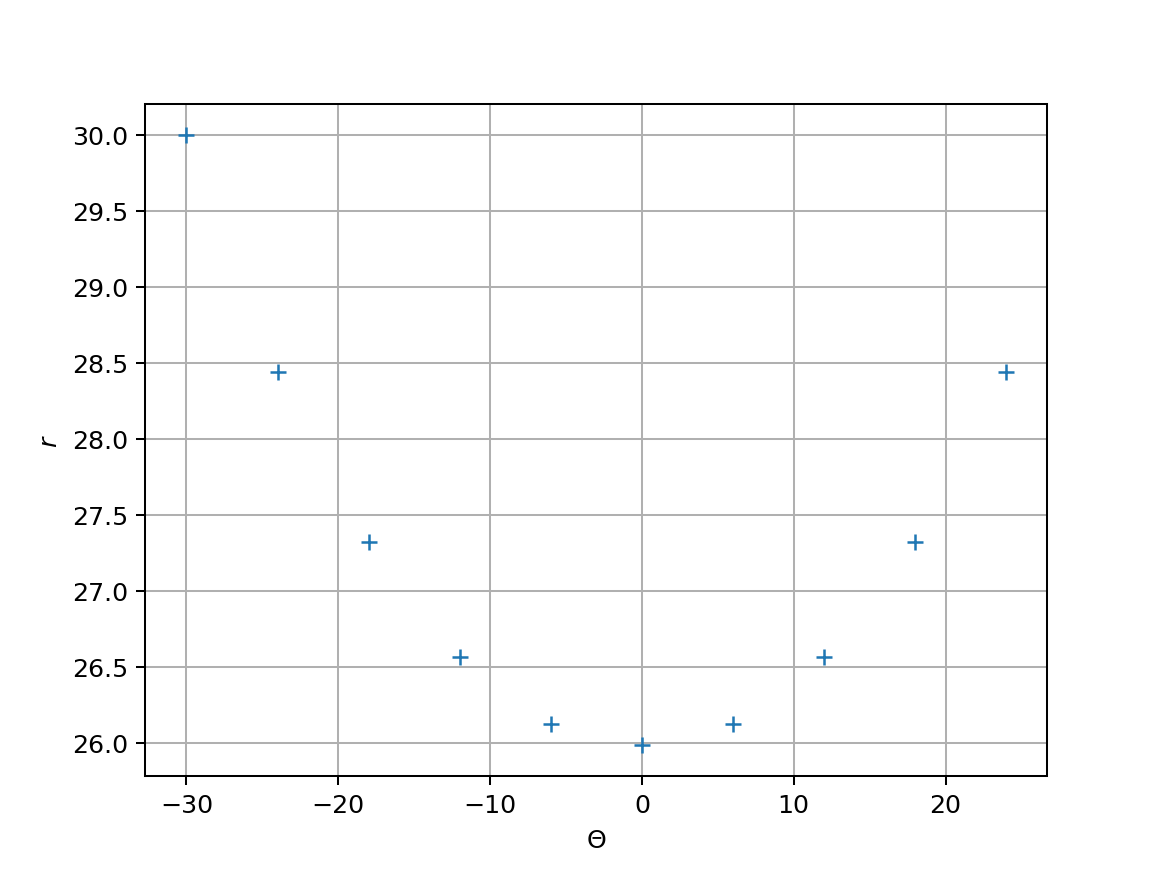

/Users/nesh/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


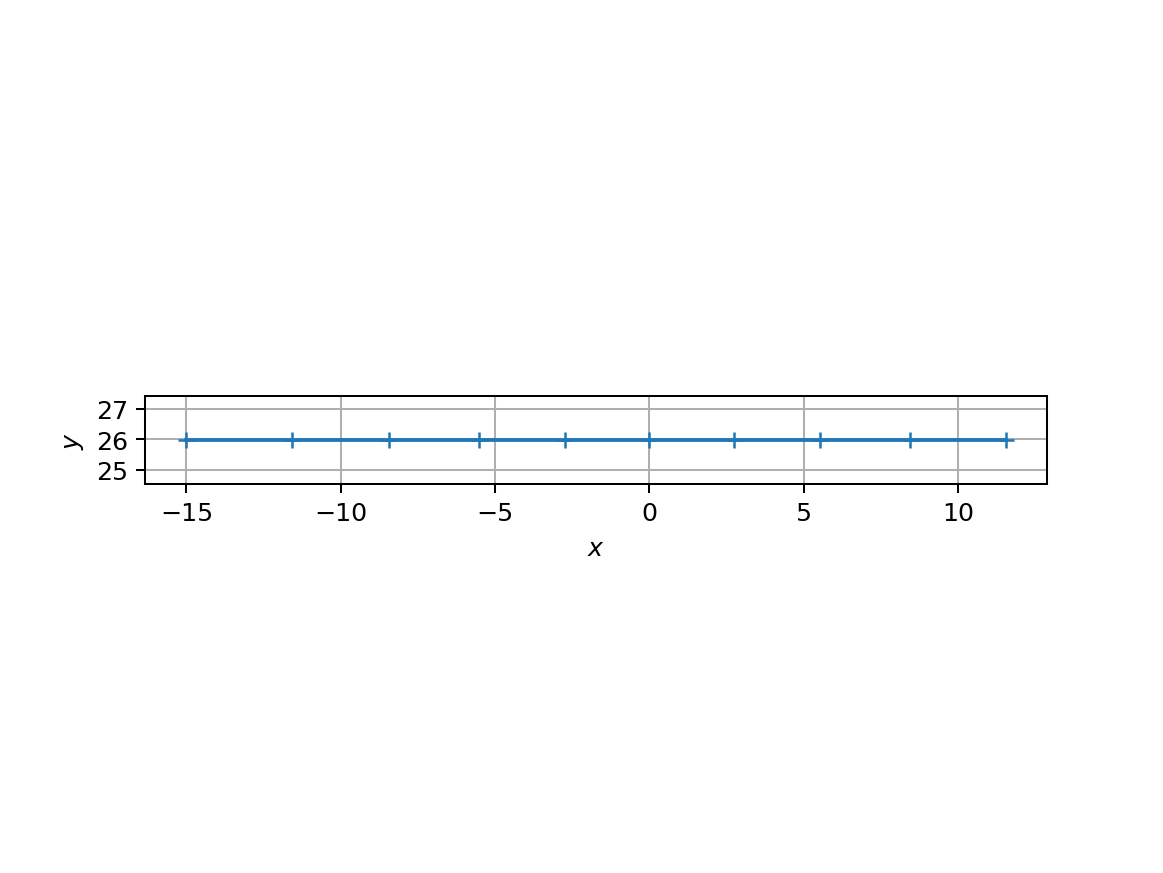

<IPython.core.display.Javascript object>


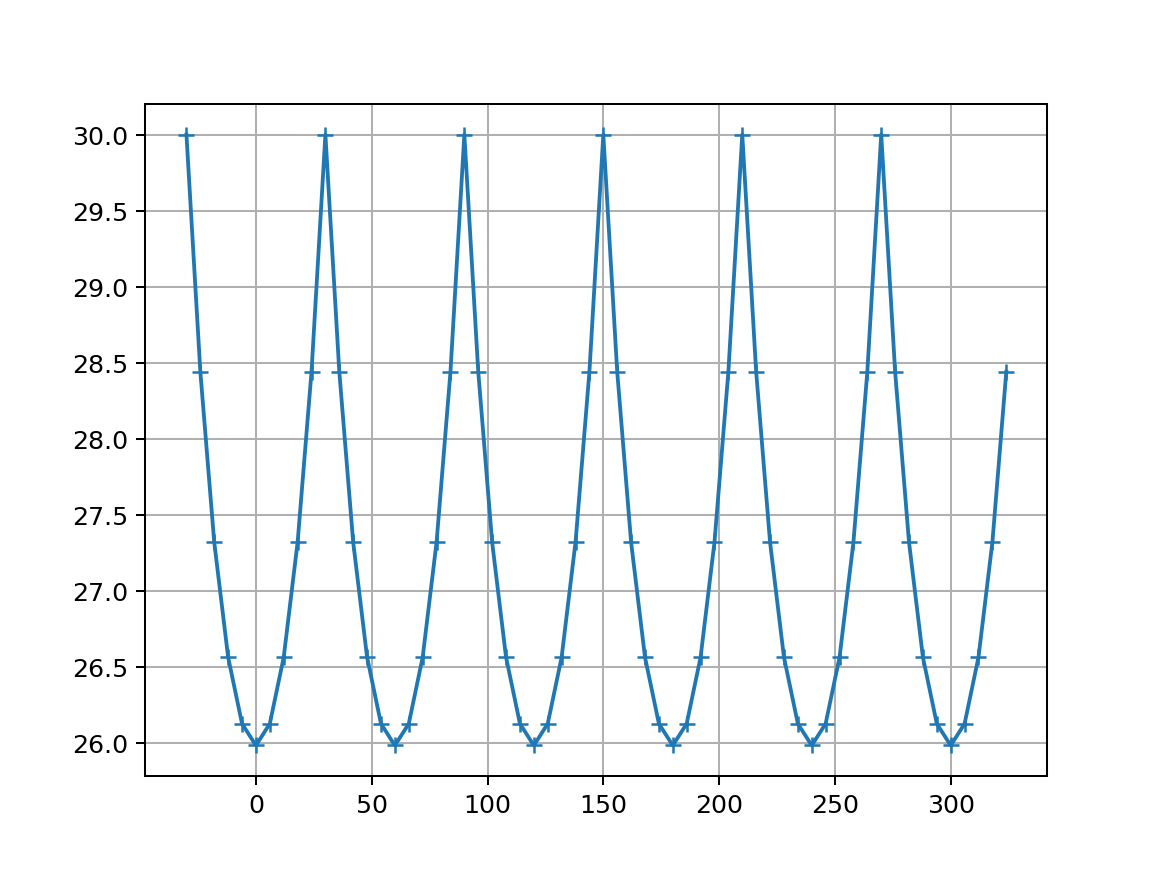

(60,)
(60,)


In [27]:
# Making the crystal

# Make the top edge of the crystal
angle = AssignQuantity(30, 'degree')
angle.ito(angle_unit)
y0 =L*np.cos(angle)
edge0_theta_complete = np.linspace(-angle,angle,npts_theta+1)
edge0_theta = edge0_theta_complete[0:-1]
dtheta = edge0_theta[1]-edge0_theta[0]
edge0_r = y0/np.cos(edge0_theta)
fig, ax = plt.subplots()
plt.plot(edge0_theta.to('degree'),edge0_r,'+')
plt.xlabel('$\Theta$')
plt.ylabel('$r$')
plt.grid(True)

# Convert to Cartesian to make sure this is a straight line at the right place
edge0_x = edge0_r*np.sin(edge0_theta)
edge0_y = edge0_r*np.cos(edge0_theta)
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(edge0_x,edge0_y,'+-')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

# Gather all the edges together as one big array
edges_theta = np.hstack([\
        edge0_theta,
        edge0_theta+2*angle,
        edge0_theta+4*angle,
        edge0_theta+6*angle,
        edge0_theta+8*angle,
        edge0_theta+10*angle])
edges_r = np.hstack([\
        edge0_r,
        edge0_r,
        edge0_r,
        edge0_r,
        edge0_r,
        edge0_r])
edges_r = AssignQuantity(edges_r,distance_unit)
edges_theta = AssignQuantity(edges_theta,angle_unit)
fig, ax = plt.subplots()
print(np.shape(edges_theta.to('degree').magnitude))
print(np.shape(edges_r.magnitude))
plt.plot(edges_theta.to('degree').magnitude,edges_r.magnitude,'+-')
plt.grid(True)
npts_edge = len(edges_r)

36.0 micrometer
dr = 0.4174682452694505 micrometer


<IPython.core.display.Javascript object>


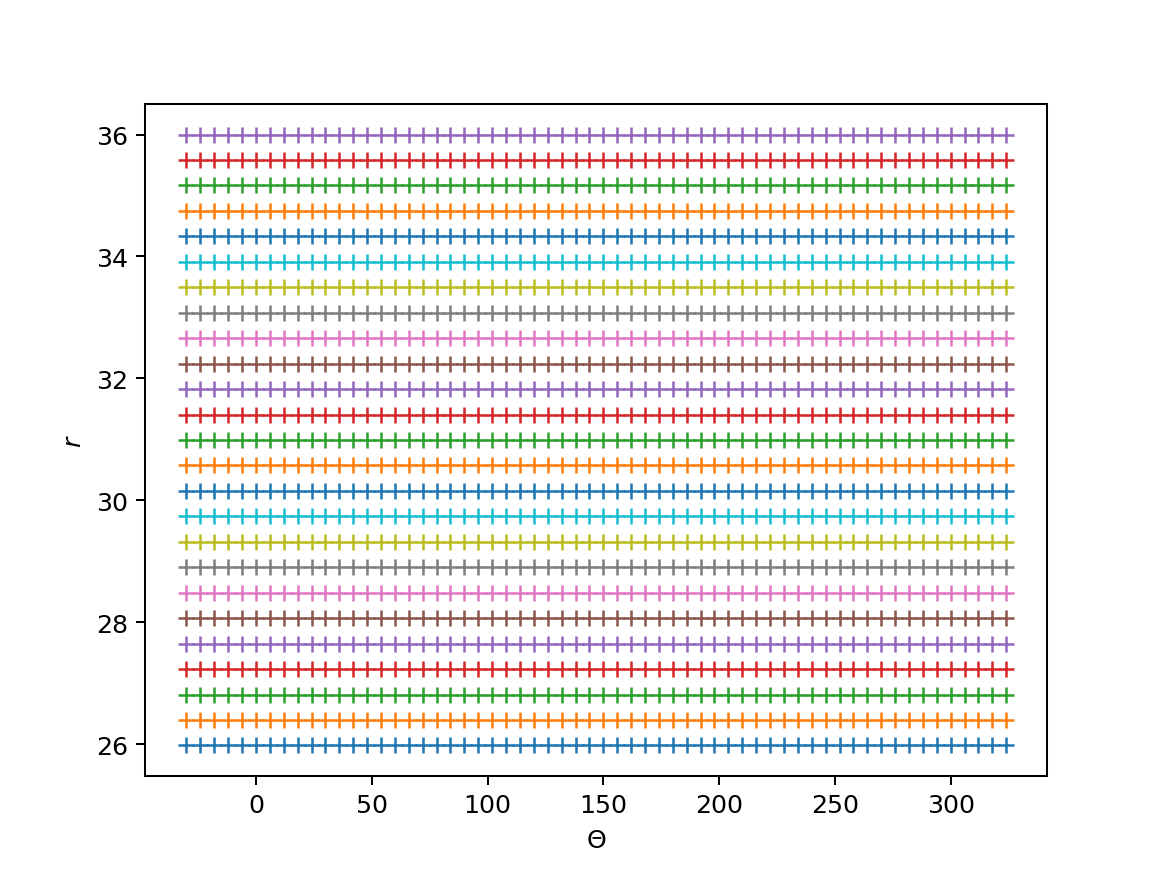

(60, 25)
(60, 25)


<IPython.core.display.Javascript object>


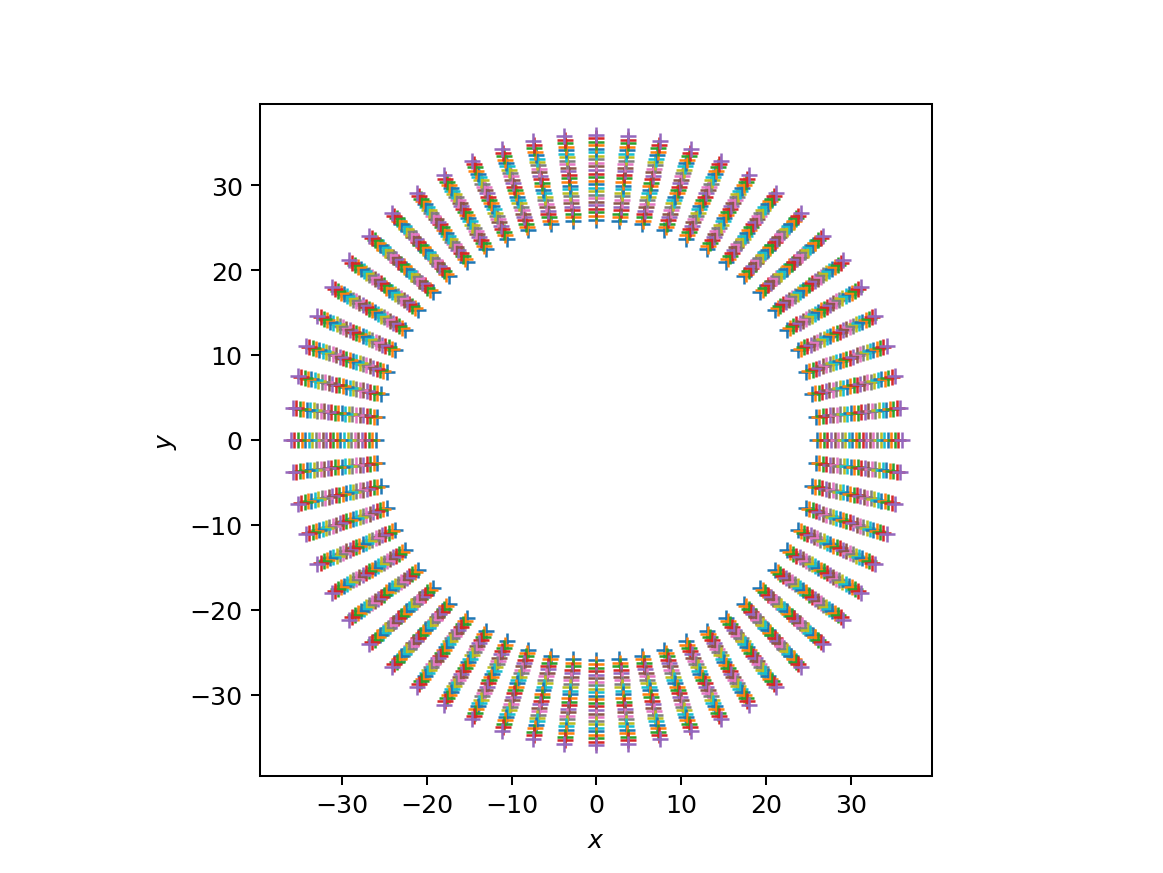

Text(0, 0.5, '$y$')

In [28]:
# Making a discretized box to put the crystal into (we'll use the crystal's angles)
rmin = np.min(edges_r); #print(rmin)
rmax = r_far_field; print(rmax)
array_r = np.linspace(rmin,rmax,npts_r)
dr = array_r[1]-array_r[0]; print('dr =', dr)
array_theta = edges_theta
grid_r, grid_theta = np.meshgrid(array_r.magnitude,array_theta.magnitude)
grid_r = AssignQuantity(grid_r,distance_unit)
grid_theta = AssignQuantity(grid_theta,angle_unit)
# print('r-values: ', grid_r[0,:])
# print('theta-values = ', grid_theta[:,0]*180/np.pi)
plt.figure()
plt.plot(grid_theta.to('degree').magnitude,grid_r.magnitude,'+')
plt.xlabel('$\Theta$')
plt.ylabel('$r$')

# Converting to Cartesian to see what this looks like
# grid_x = array_r*np.sin(grid_theta)
# grid_y = array_r*np.cos(grid_theta)
grid_x = grid_r*np.sin(grid_theta); print(np.shape(grid_x))
grid_y = grid_r*np.cos(grid_theta); print(np.shape(grid_y))
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(grid_x.magnitude,grid_y.magnitude,'+')
plt.xlabel('$x$')
plt.ylabel('$y$')

In [29]:
# Physical parameters

# Setting ice parameters
sigma0 = 0.2
print('sigma0 = ',sigma0)

# The far-field supersaturation
sigmaI_far_field = 0.3

# Temperature and pressure
Temp = AssignQuantity(240,'kelvin')
Pressure = AssignQuantity(50,'pascal')

# Converting to the desired pressure unit
Pressure.ito(pressure_unit)
print('Pressure = ', Pressure)
print('Temperature = ',Temp)

# Checking on the plausibility of this growth rate
nu_kin = VFD.get_nu_kin(Temp,AssignQuantity)
print('g_ice should be smaller than sigmaI_far_field x nu_kin ...')
print('nu_kin = ', nu_kin)
print('sigmaI_far_field x nu_kin = ', sigmaI_far_field*nu_kin)

# Compute diffusion coefficient of water through air at this temperature
# This is using trends from engineering toolbox, with the log-log correction
D = VFD.getDofTP(Temp,Pressure,AssignQuantity); print('D = ', D)

# Growth rate
g_ice = AssignQuantity(1,'micrometer/second')

# Calculating the Neumann condition at the vapor/ice boundary (starting with ice density)
rho_ice = AssignQuantity(0.9,'g/cm^3')
Mvap = AssignQuantity(18,'g/mol')
R = AssignQuantity(8.314,'J/mol/kelvin')

sigma0 =  0.2
Pressure =  50 pascal
Temperature =  240 kelvin
g_ice should be smaller than sigmaI_far_field x nu_kin ...
nu_kin =  39.341788071548116 micrometer / second
sigmaI_far_field x nu_kin =  11.802536421464435 micrometer / second
D0 =  21.893732126411837
D =  34908.31943863489 micrometer ** 2 / microsecond


In [30]:
# Time step, boundary conditions, etc.

# Getting a suitable time step
dt = dr**2/D/3; print('dt = ', dt)

# Computing effective diffusion coefficents - which should be dimensionless
D_times_dt = D*dt; print('D_times_dt = ', D_times_dt)
Dthetaeff = D*dt/dtheta**2/L**2; print('Dthetaeff = ', Dthetaeff)

# kappa (need to check if this is right)
kappa = rho_ice*g_ice*R*Temp/(Mvap*dr); kappa.ito(pressure_unit+'/'+time_unit)

# Neumann
uneumann = kappa*dt
uneumann_mag = uneumann.magnitude

# Calculating the dirichlet conditions at the far-field boundary
sigmaII_far_field = sigmaI_far_field - sigma0
print('sigmaI_far_field = ', sigmaI_far_field)
print('sigmaII_far_field = ', sigmaII_far_field)

# Converting this into pressures
P3 = AssignQuantity(611,'Pa')
T3 = AssignQuantity(273,'kelvin')
Delta_H_sub = AssignQuantity(50,'kJ/mol')
P_vapor_eq = P3*np.exp(-Delta_H_sub/R*(1/Temp-1/T3)); print('Equilibrium vapor pressure at this temperature = ', P_vapor_eq)
udirichlet = P_vapor_eq*(sigmaI_far_field+1)
print('udirichlet = ', udirichlet)

# Making dimensionless variables for efficiency
udirichlet_mag = udirichlet.magnitude

dt =  1.6641661988791267e-06 microsecond
D_times_dt =  0.05809324526945136 micrometer ** 2
Dthetaeff =  0.005886076372325454 / radian ** 2
sigmaI_far_field =  0.3
sigmaII_far_field =  0.09999999999999998
Equilibrium vapor pressure at this temperature =  29.55023347583504 pascal
udirichlet =  38.41530351858555 pascal


In [31]:
# Index <--> position interconversion functions

def r_to_ir(r,array_r):
    dr = array_r[1]-array_r[0]
    ir = np.rint((r-array_r[0])/dr).astype(int)
    return ir
r_test = AssignQuantity(107, distance_unit)
ir_test = r_to_ir(r_test, array_r)
print(ir_test)

def ir_to_r(ir_test,array_r):
    dr = array_r[1]-array_r[0]
    r = ir_test*dr+array_r[0]
    return r
r_test2 = ir_to_r(ir_test, array_r)
print('r_test2', r_test2)
print('r Differences ... ', r_test2-r_test)

def theta_to_itheta(theta, array_theta):
    dtheta = array_theta[1]-array_theta[0]
    itheta = np.rint((theta-array_theta[0])/dtheta).astype(int)
    return itheta
theta_test = AssignQuantity(-32, 'degree')
itheta_test = theta_to_itheta(theta_test.to(angle_unit), array_theta)
print(itheta_test)

def itheta_to_theta(itheta, array_theta):
    dtheta = array_theta[1]-array_theta[0]
    theta = itheta*dtheta+array_theta[0]
    return(theta)
theta_test2 = itheta_to_theta(itheta_test, array_theta)
print('theta_test2', theta_test2)
print('theta Differences ... ', theta_test2-theta_test)

194 dimensionless
r_test2 106.96960169580655 micrometer
r Differences ...  -0.03039830419345435 micrometer
0 dimensionless
theta_test2 -0.5235987755982988 radian
theta Differences ...  0.03490658503988664 radian


10 dimensionless


<IPython.core.display.Javascript object>


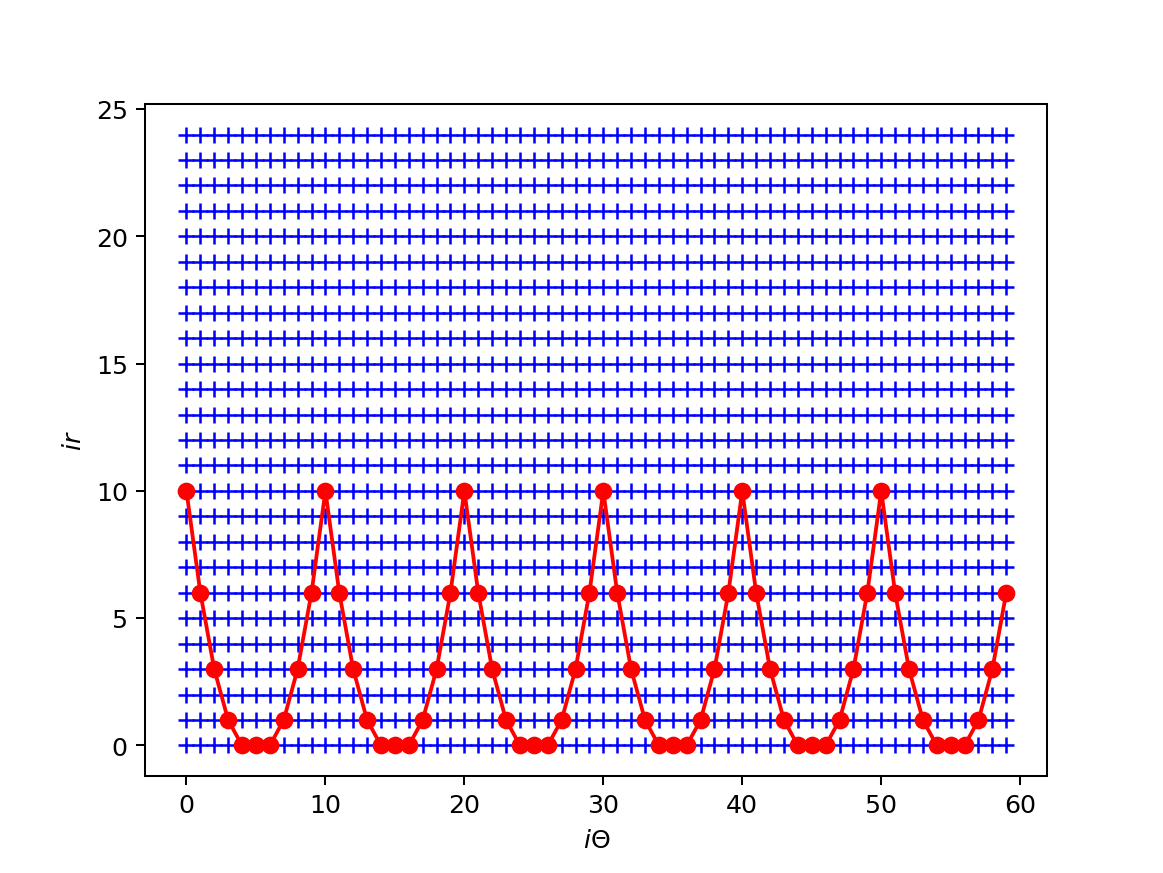

<IPython.core.display.Javascript object>


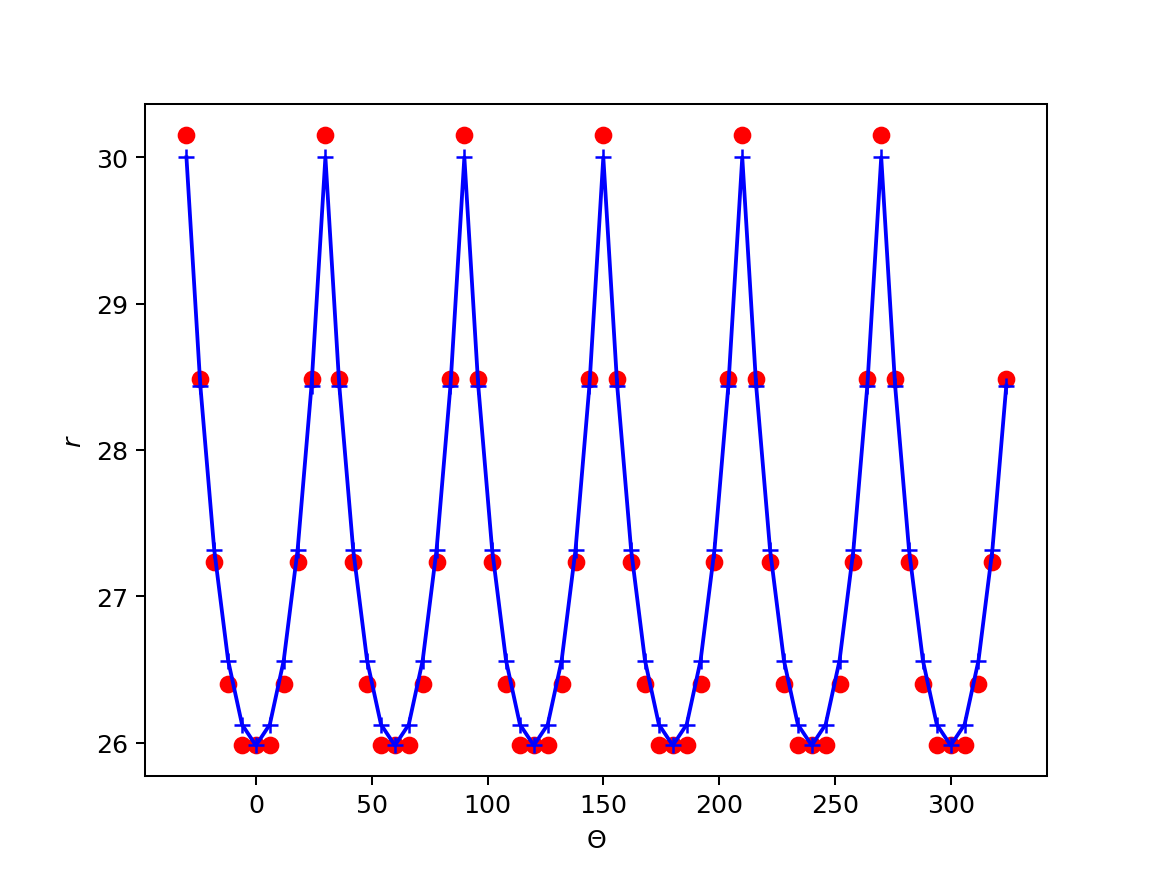

Text(0, 0.5, '$r$')

In [32]:
# Plotting the crystal edge in index space
edges_ir = r_to_ir(edges_r,array_r)
edges_itheta = theta_to_itheta(edges_theta, array_theta)
edges_ir_max = np.max(edges_ir); print(edges_ir_max)

igrid_r = r_to_ir(grid_r,array_r)
igrid_theta = theta_to_itheta(grid_theta, array_theta)

plt.figure()
plt.plot(igrid_theta,igrid_r,'+b')
plt.plot(edges_itheta.magnitude,edges_ir.magnitude,'ro-')
plt.xlabel('$i\Theta$')
plt.ylabel('$ir$')

edges_r2 = ir_to_r(edges_ir, array_r)
edges_theta2 = itheta_to_theta(edges_itheta, array_theta)

plt.figure()
plt.plot(edges_theta2.to('degree'),edges_r2,'ro')
plt.plot(edges_theta.to('degree').magnitude,edges_r.magnitude,'b+-')
plt.xlabel('$\Theta$')
plt.ylabel('$r$')

### Progress
The cells below are "in progress"

In [35]:
def Polar_propagate_hexagon(u0, udirichlet, uneumann, \
                            Dreff1, Dreff2, Dteff2, \
                            edges_ir, edges_itheta, edges_ir_max, \
                            array_r, left_partner, right_partner):

    # Propagates the vapor field forward one time step
    
    # Initialize starting values
    un = np.zeros(np.shape(u0))

    # Diffusion in the radial direction
    npts_edge = len(edges_itheta)
    for itheta in range(npts_edge):
        
        # Radial indices for the adjacent surface (ir) and the two farther out
        ir = edges_ir[itheta]
        ir_plus1 = ir+1
        ir_plus2 = ir+2
        
        # These assignments are for one pixel beyond the adjacent surface, out to the far field
        un[itheta,ir_plus1:-1] = u0[itheta,ir_plus1:-1] +\
            (u0[itheta,ir_plus2:] - 2*u0[itheta,ir_plus1:-1] +u0[itheta,ir:-2])*Dreff2 +\
            (u0[itheta,ir_plus2:]   - u0[itheta,ir_plus1:-1])                  *Dreff1/array_r[ir_plus1:-1]
        
        # This assignment is for the adjacent pixel 
        un[itheta,ir] = u0[itheta,ir] +\
            (u0[itheta,ir_plus1] - u0[itheta,ir])*Dreff2 +\
            (u0[itheta,ir_plus1] - u0[itheta,ir])*Dreff1/array_r[ir]
        
#       3rd part of Laplacian (second derivative with respect to theta) ... starting at r > r_corner 
#         if itheta != (npts_edge-1):
#             un[itheta,edges_ir_max+1:] += \
#                 (u0[itheta-1,edges_ir_max+1:] -2*u0[itheta,edges_ir_max+1:] +u0[itheta+1,edges_ir_max+1:] ) \
#                     *Dteff2/array_r[edges_ir_max+1:]**2
#         else:
#             un[itheta,edges_ir_max+1:] += \
#                 (u0[itheta-1,edges_ir_max+1:] -2*u0[itheta,edges_ir_max+1:] +u0[0,edges_ir_max+1:] ) \
#                     *Dteff2/array_r[edges_ir_max+1:]**2
#         if left_partner[itheta]:
#             un[itheta,ir] += \
#                 (u0[itheta-1,ir] - u0[itheta,ir])*Dteff2/array_r[ir]**2
#         if right_partner[itheta]:
#             un[itheta,ir] += \
#                 (u0[itheta+1,ir] - u0[itheta,ir])*Dteff2/array_r[ir]**2

#       3rd part of Laplacian (second derivative with respect to theta) ... starting at r = adjacent surface
#       General algorithm, followed by un-doing if needed
        if itheta != (npts_edge-1):
            un[itheta,ir:] += \
                (u0[itheta-1,ir:] -2*u0[itheta,ir:] +u0[itheta+1,ir:] ) *Dteff2/array_r[ir:]**2
            if left_partner[itheta] == False:
                un[itheta,ir] -= \
                (u0[itheta-1,ir] - u0[itheta,ir])*Dteff2/array_r[ir]**2
            if right_partner[itheta] == False:
                un[itheta,ir] -= \
                (u0[itheta+1,ir] - u0[itheta,ir])*Dteff2/array_r[ir]**2
        else:
            un[itheta,ir+1:] += \
                (u0[itheta-1,ir+1:] -2*u0[itheta,ir+1:] +u0[0,ir+1:] ) *Dteff2/array_r[ir+1:]**2
            if left_partner[itheta] == False:
                un[itheta,ir] -= \
                (u0[itheta-1,ir] - u0[itheta,ir])*Dteff2/array_r[ir]**2
            if right_partner[itheta] == False:
                un[itheta,ir] -= \
                (u0[0,ir] - u0[itheta,ir])*Dteff2/array_r[ir]**2
            
        
    # Assigning Dirichlet conditions at the far-field limit
    un[:,-1] = udirichlet
    
    # Assigning Neumann conditions above the crystal surface
    for i in range(npts_edge):
        un[edges_itheta[i],edges_ir[i]] -= uneumann
            
    return(un)

In [36]:
# Decide on a time to propagate forward
tmax = AssignQuantity(.02,time_unit)
ntimes = int(tmax/dt)
print('Integrating steps = ', ntimes)
print('Integrating out to ', ntimes*dt) # This is a check -- it should be very close to the tmax specified above
Dreff1 = (D_times_dt / dr)
Dreff2 = (D_times_dt / dr**2)
Dteff2 = (D_times_dt / dtheta**2)

# Propagate forward in time
un = np.zeros(np.shape(igrid_r))
un[:,-1] = udirichlet.magnitude
for i in range(ntimes):
    un = Polar_propagate_hexagon(\
        un, udirichlet.magnitude, uneumann.magnitude, \
        Dreff1.magnitude, Dreff2.magnitude, Dteff2.magnitude, \
        edges_ir.magnitude, edges_itheta.magnitude, edges_ir_max.magnitude, array_r.magnitude, left_partner, right_partner)

Integrating steps =  12018
Integrating out to  0.019999949378129343 microsecond


0


<IPython.core.display.Javascript object>


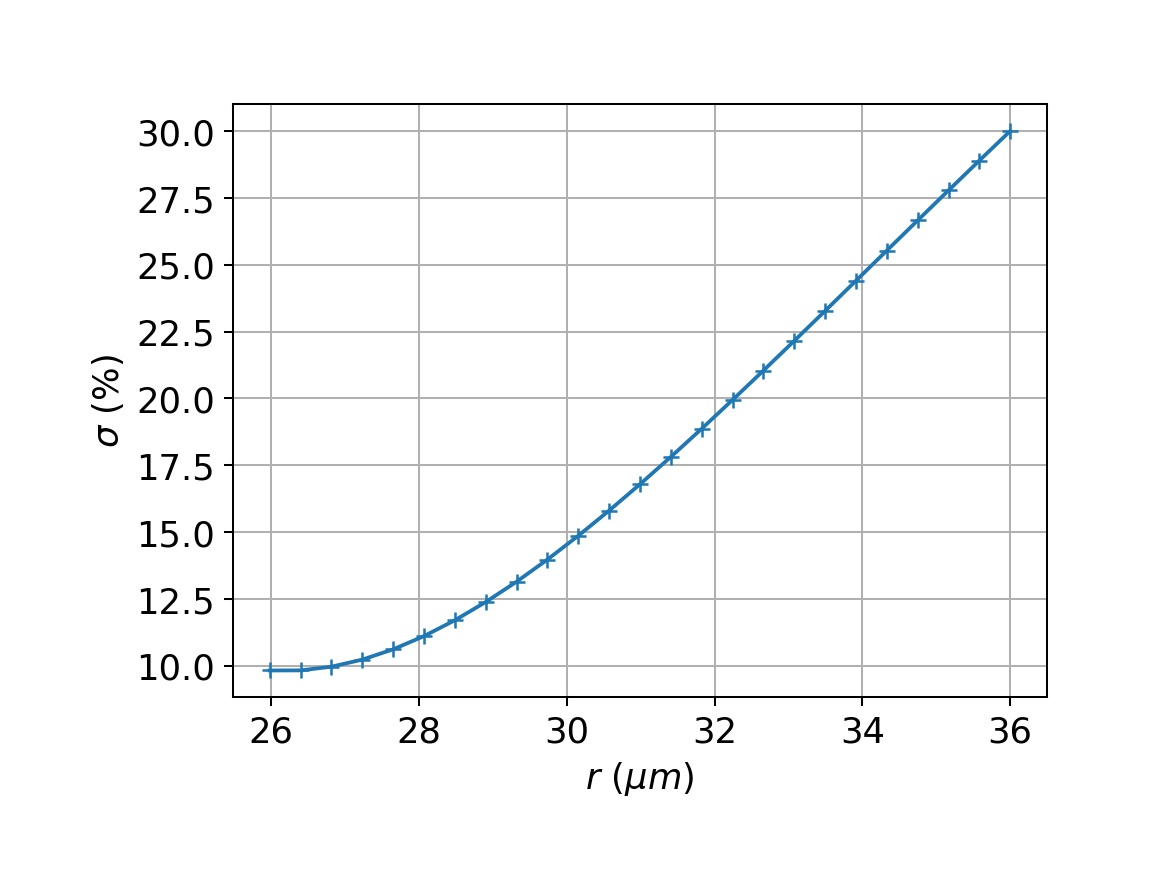

<IPython.core.display.Javascript object>


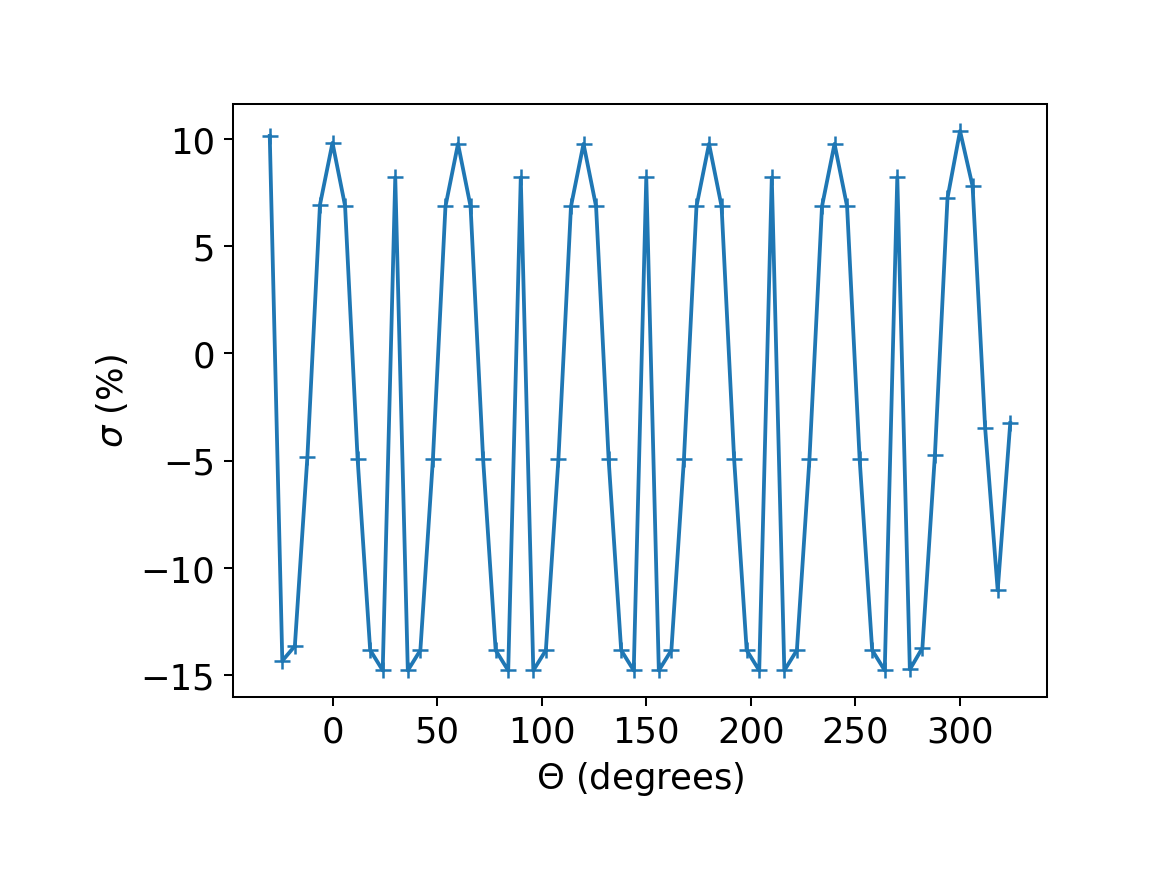

sigma1 9.82315651922483
sigma2 30.0


<IPython.core.display.Javascript object>


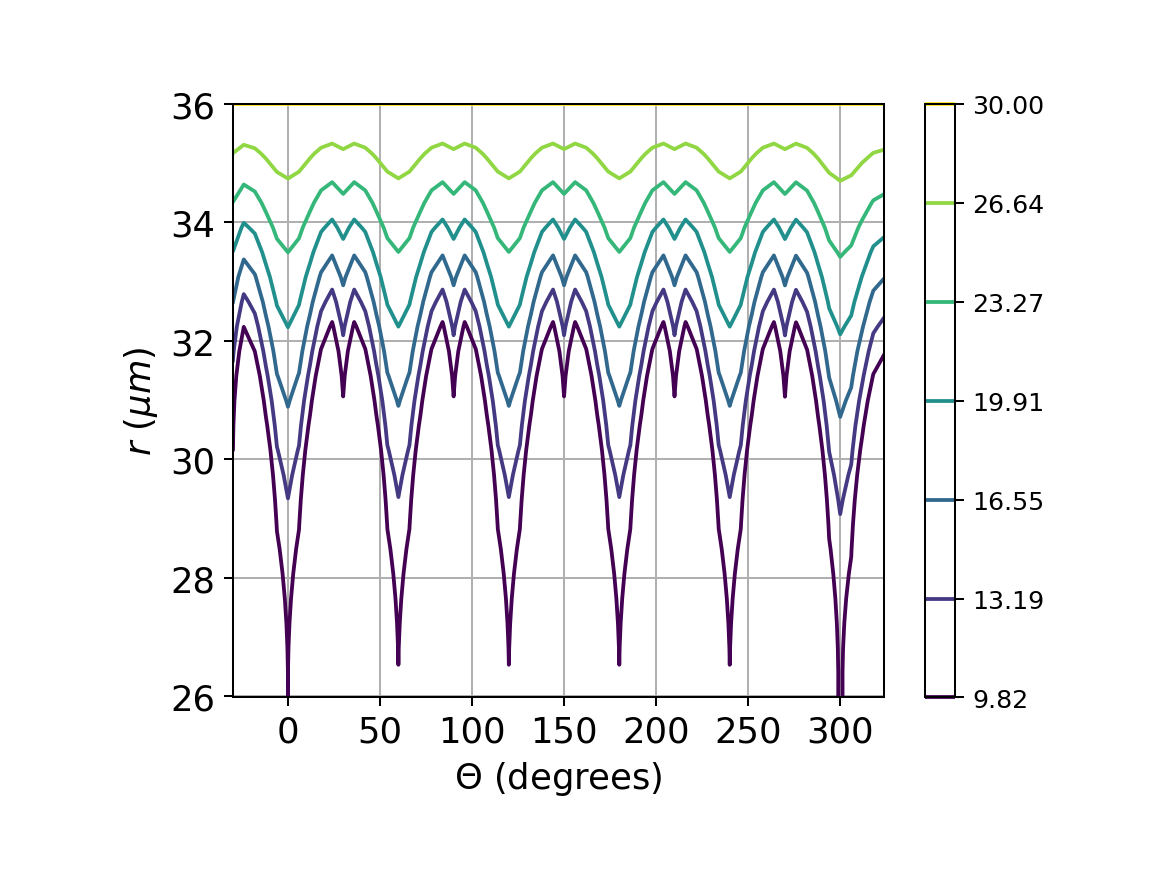

In [37]:
# Graphic investigation of the results

# As a function of r (starting at the adjacent surface, for an angle in the middle of the 1st facet)
ir0 = edges_ir[itheta_middle].magnitude; print(ir0)
sigma_radial = (un[itheta_middle,ir0:]/P_vapor_eq.magnitude-1)*100
plt.figure()
plt.plot(array_r[ir0:],sigma_radial,'+-')
plt.xlabel('$r$ ($\mu m$)', fontsize=fontsize)
plt.subplots_adjust(bottom=margin) 
plt.subplots_adjust(left=margin) 
plt.ylabel('$\sigma \  (\%)$', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid(True)

# As a function of angle at the adjacent surface (ir)
sigma_edge = np.zeros(npts_edge)
for itheta in range(npts_edge):
    ir = edges_ir[itheta].magnitude
    sigma_edge[itheta] = (un[itheta,ir]/P_vapor_eq.magnitude-1)*100
plt.figure()
plt.plot(array_theta.to('degree').magnitude,sigma_edge,'+-')
plt.xlabel('$\Theta$ (degrees)', fontsize=fontsize)
plt.ylabel('$\sigma \  (\%)$', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.subplots_adjust(bottom=margin) 
plt.subplots_adjust(left=margin) 

# As a contour plot in {theta,r} space
sigma_grid = (un/P_vapor_eq.magnitude-1)*100
sigma1 = sigma_grid[itheta_middle,ir0]; print('sigma1',sigma1)
sigma2 = sigmaI_far_field*100; print('sigma2',sigma2)
nlevels = 7
levels = np.linspace(sigma1,sigma2,nlevels)
fig,ax = plt.subplots()
CS = ax.contour(array_theta.to('degree').magnitude,array_r.magnitude,sigma_grid.T,levels)
ax.set_xlabel('$\Theta$ (degrees)', fontsize=fontsize)
ax.set_ylabel('$r$ ($\mu m$)', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.subplots_adjust(bottom=margin)
plt.subplots_adjust(left=margin)
plt.grid(True)
fig.colorbar(CS)

In [67]:
# # Making a paired list of the crystal edge indices (may not need this)
# edges = []
# for i in range (len(edges_theta)):
#     edges.append([edges_theta.to('degree')[i].magnitude, edges_r[i].magnitude])
# edges = np.array(edges)
# print(edges)

# iedges = []
# for i in range (len(edges_itheta)):
#     iedges.append([edges_itheta[i].magnitude, edges_ir[i].magnitude])
# iedges = np.array(iedges)
# print('iedges', iedges)

In [68]:
# # Calculating the diffusion coefficient matrix, with zeros for in and around the crystal
# Dmatrix = np.ones((nx-1,ny-1))*Deff.magnitude
# nx_D, ny_D = np.shape(Dmatrix)
# print(nx_D, ny_D)
# for i in range(n_inside_unique):
#     Dmatrix[i_inside_unique[0,i],i_inside_unique[1,i]] = 0
#     Dmatrix[i_inside_unique[0,i]-1,i_inside_unique[1,i]] = 0
# #     Dmatrix[i_inside_unique[0,i]+1,i_inside_unique[1,i]] = 0
#     Dmatrix[i_inside_unique[0,i],i_inside_unique[1,i]-1] = 0
# #     Dmatrix[i_inside_unique[0,i],i_inside_unique[1,i]+1] = 0

# # Checking    
# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# plt.plot(ix_inside_unique,iy_inside_unique,'x')
# for ix in range(nx_D):
#     for iy in range(ny_D):
#         if Dmatrix[ix,iy] != 0:
#             plt.plot(ix,iy,'+g',)

In [69]:
# # Getting indices of pixels inside the crystal
# iedges_unique_float = iedges_unique.astype(float)
# polygon = iedges_unique_float.T
# path = mpltPath.Path(polygon); #print(path)
# ix_inside = []
# iy_inside = []
# for ix in range(nx):
#     for iy in range(ny):
#         inside = path.contains_points([[ix,iy]])
#         if inside:
#             ix_inside.append(ix)
#             iy_inside.append(iy)
# i_inside = np.vstack((ix_inside,iy_inside))
# i_inside_unique, n_inside_unique = VFD.removedups2(i_inside,iedges_unique)
# ix_inside_unique = i_inside_unique[0,:]
# iy_inside_unique = i_inside_unique[1,:]
# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# for i in range(npts_unique):
#     plt.plot(iedges_unique[0,i],iedges_unique[1,i],'+g')
# plt.plot(ix_inside_unique,iy_inside_unique,'x')

In [70]:
# # Calculating the diffusion coefficient matrix, with zeros for in and around the crystal
# Dmatrix = np.ones((nx-1,ny-1))*Deff.magnitude
# nx_D, ny_D = np.shape(Dmatrix)
# print(nx_D, ny_D)
# for i in range(n_inside_unique):
#     Dmatrix[i_inside_unique[0,i],i_inside_unique[1,i]] = 0
#     Dmatrix[i_inside_unique[0,i]-1,i_inside_unique[1,i]] = 0
# #     Dmatrix[i_inside_unique[0,i]+1,i_inside_unique[1,i]] = 0
#     Dmatrix[i_inside_unique[0,i],i_inside_unique[1,i]-1] = 0
# #     Dmatrix[i_inside_unique[0,i],i_inside_unique[1,i]+1] = 0

# # Checking    
# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# plt.plot(ix_inside_unique,iy_inside_unique,'x')
# for ix in range(nx_D):
#     for iy in range(ny_D):
#         if Dmatrix[ix,iy] != 0:
#             plt.plot(ix,iy,'+g',)

In [71]:
# def propagate_hexagon(u0,udirichlet,uneumann,Deff,Dmatrix,iedges,npts_total):

#     # Propagates the vapor field forward one time step
    
#     # Initialize starting values
#     un = np.zeros(np.shape(u0))

#     # Diffusion throughout (this is wrong)
#     un[1:-1, 1:-1] = u0[1:-1, 1:-1] + ( \
#     ( (u0[2:, 1:-1] - u0[1:-1, 1:-1])*Dmatrix[1:,1:] + (u0[0:-2, 1:-1] -u0[1:-1, 1:-1])*Dmatrix[0:-1,1:] ) + \
#     ( (u0[1:-1, 2:] - u0[1:-1, 1:-1])*Dmatrix[1:,1:] + (u0[1:-1, 0:-2] -u0[1:-1, 1:-1])*Dmatrix[1:,0:-1] ) )
    
#     # Assigning Dirichlet conditions at the perimeter of the simulation box
#     un[[0,-1],:] = udirichlet
#     un[:,[0,-1]] = udirichlet
    
#     # Assigning Neumann conditions above the crystal surface
#     for i in range(npts_total):
#         un[iedges[0,i],iedges[1,i]] -= uneumann
            
#     return(un)